In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#import the countries data from the csv file with an index column of countries
df_jan = pd.read_csv("Jan23_Feb7_data.csv")
#timestamp column to datetime 
df_jan['timestamp'] = pd.to_datetime(df_jan['timestamp'])
df_jan = df_jan.resample('H', on ='timestamp', axis=0).mean()
df_jan.head()


,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2024-01-23 14:00:00,44.538462,32.076923,51.076923
2024-01-23 15:00:00,47.066667,32.316667,50.083333
2024-01-23 16:00:00,46.850000,32.833333,50.733333
2024-01-23 17:00:00,45.450000,32.233333,49.616667
2024-01-23 18:00:00,45.683333,32.600000,49.816667


In [4]:
df_weather = pd.read_csv("AW_Jan22_Feb7.csv")
#timestamp column to datetime
df_weather['timestamp'] = pd.to_datetime(df_weather['Simple_Date'])
df_weather = df_weather.set_index('timestamp')
df_weather = df_weather.drop(columns=['Date'])
df_weather = df_weather.drop(columns=['Simple_Date'])
# Resample to hourly data points
df_weather = df_weather.resample('H').mean()
# View the first few rows of the resampled dataframe
#print(df_weather.head())

#combined both datasets on the timestamp index
df_combined = pd.concat([df_jan, df_weather], axis=1, join='outer')
df_combined.dropna(inplace=True)
df_combined.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor_Temperature,Wind_Speed,Wind_Gust,Max_Daily_Gust,Wind_Direction,Hourly_Rain,Event_Rain,Daily_Rain,Weekly_Rain,Monthly_Rain,Total_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Absolute_Pressure,CO2_battery
timestamp,,,,,,,,,,,,,,,,,,,,
2024-01-23 14:00:00,44.538462,32.076923,51.076923,50.525000,0.141667,0.550000,12.5,160.833333,0.0,0.06,0.06,0.06,5.33,71.92,30.268333,85.916667,0.0,72.400000,29.304167,1.0
2024-01-23 15:00:00,47.066667,32.316667,50.083333,51.033333,0.583333,0.916667,12.5,71.666667,0.0,0.06,0.06,0.06,5.33,71.92,30.269167,85.416667,0.0,47.875000,29.302500,1.0
2024-01-23 16:00:00,46.850000,32.833333,50.733333,50.958333,0.908333,1.383333,12.5,89.083333,0.0,0.06,0.06,0.06,5.33,71.92,30.266667,85.833333,0.0,38.716667,29.304167,1.0
2024-01-23 17:00:00,45.450000,32.233333,49.616667,50.791667,1.316667,2.150000,12.5,122.500000,0.0,0.06,0.06,0.06,5.33,71.92,30.263333,85.416667,0.0,11.833333,29.299167,1.0
2024-01-23 18:00:00,45.683333,32.600000,49.816667,50.066667,0.725000,1.383333,12.5,130.000000,0.0,0.06,0.06,0.06,5.33,71.92,30.266667,86.833333,0.0,0.175000,29.303333,1.0


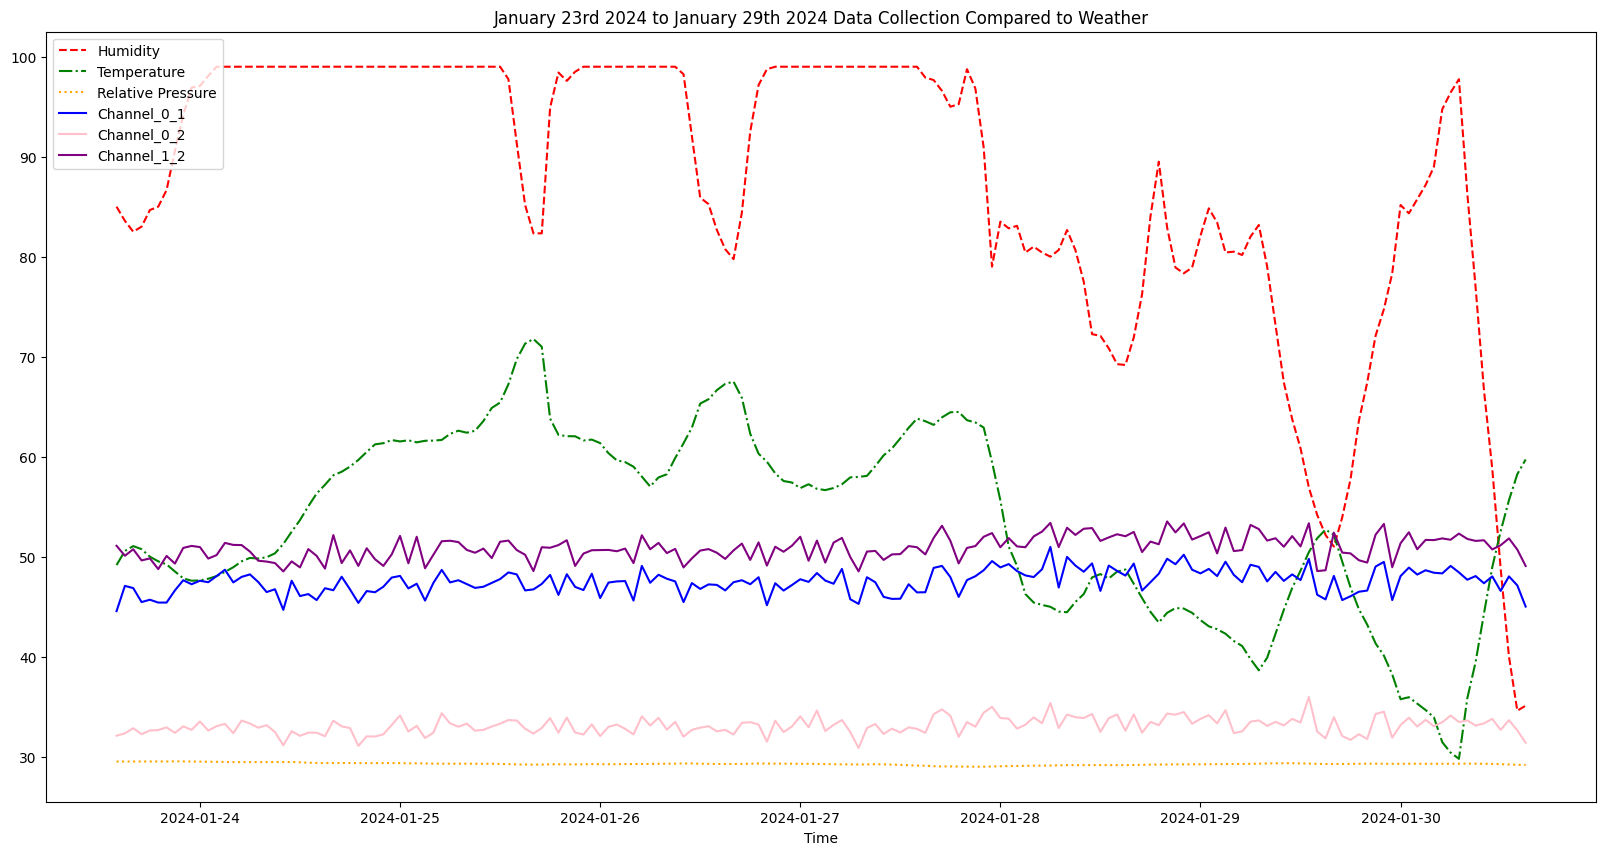

In [4]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Humidity', 'Temperature', 'Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


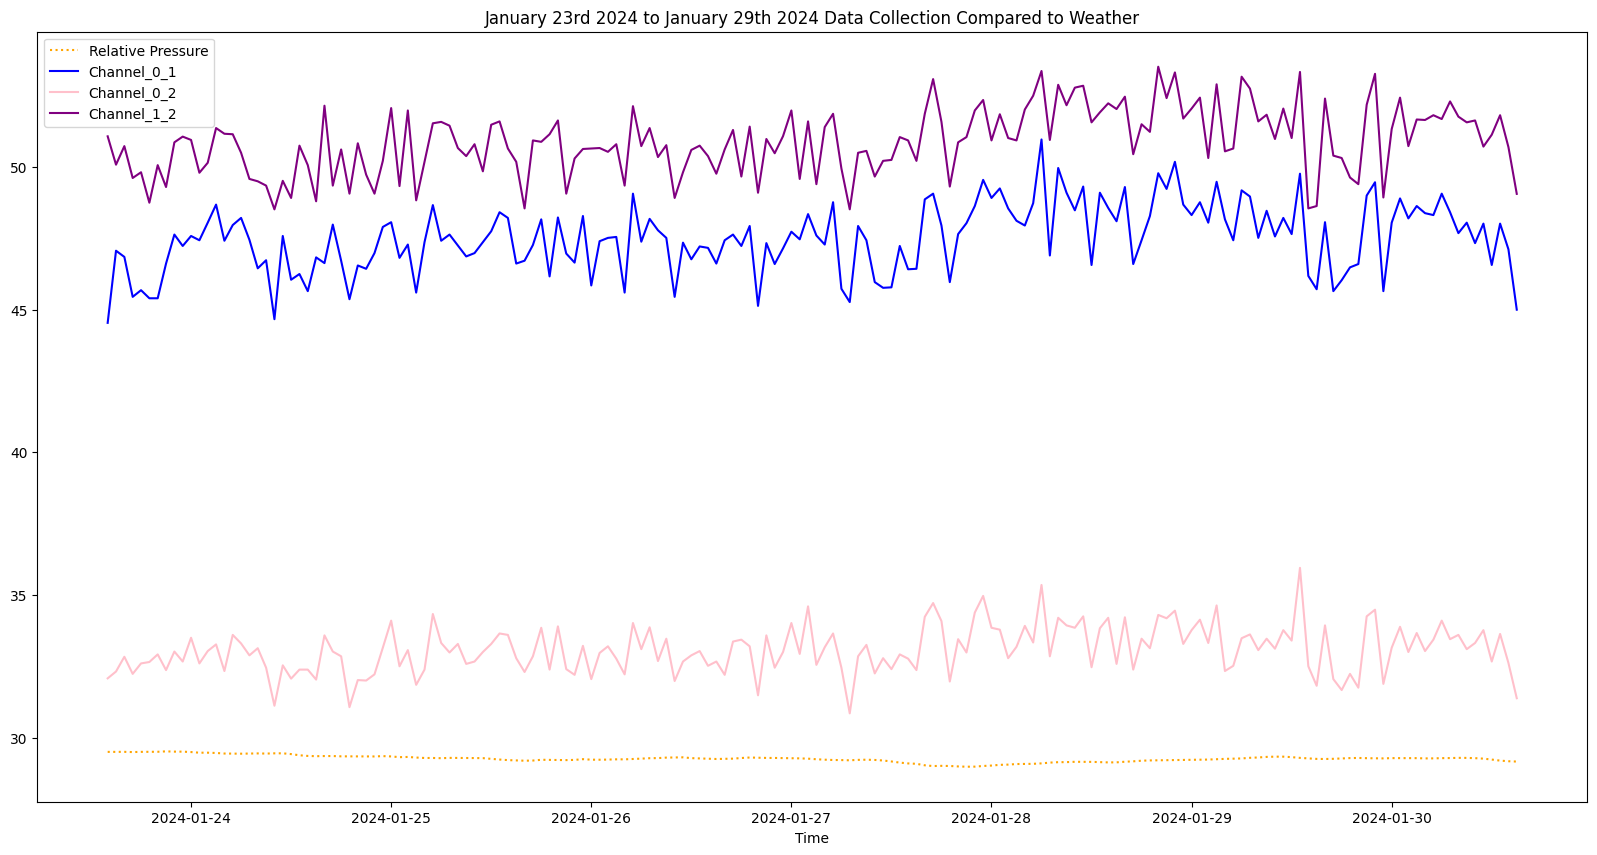

In [18]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


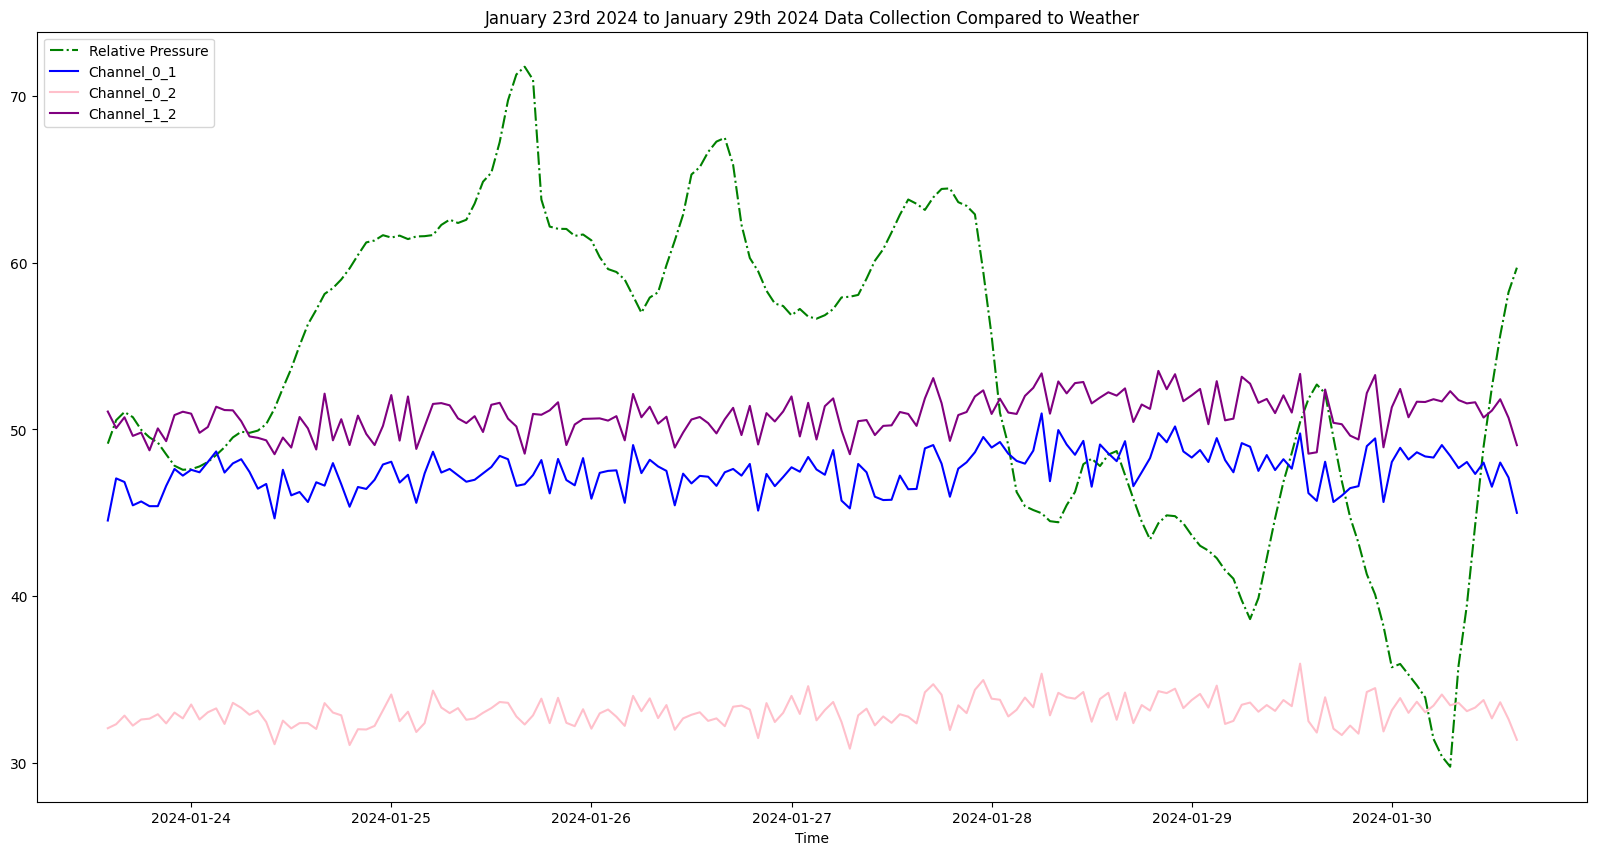

In [19]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


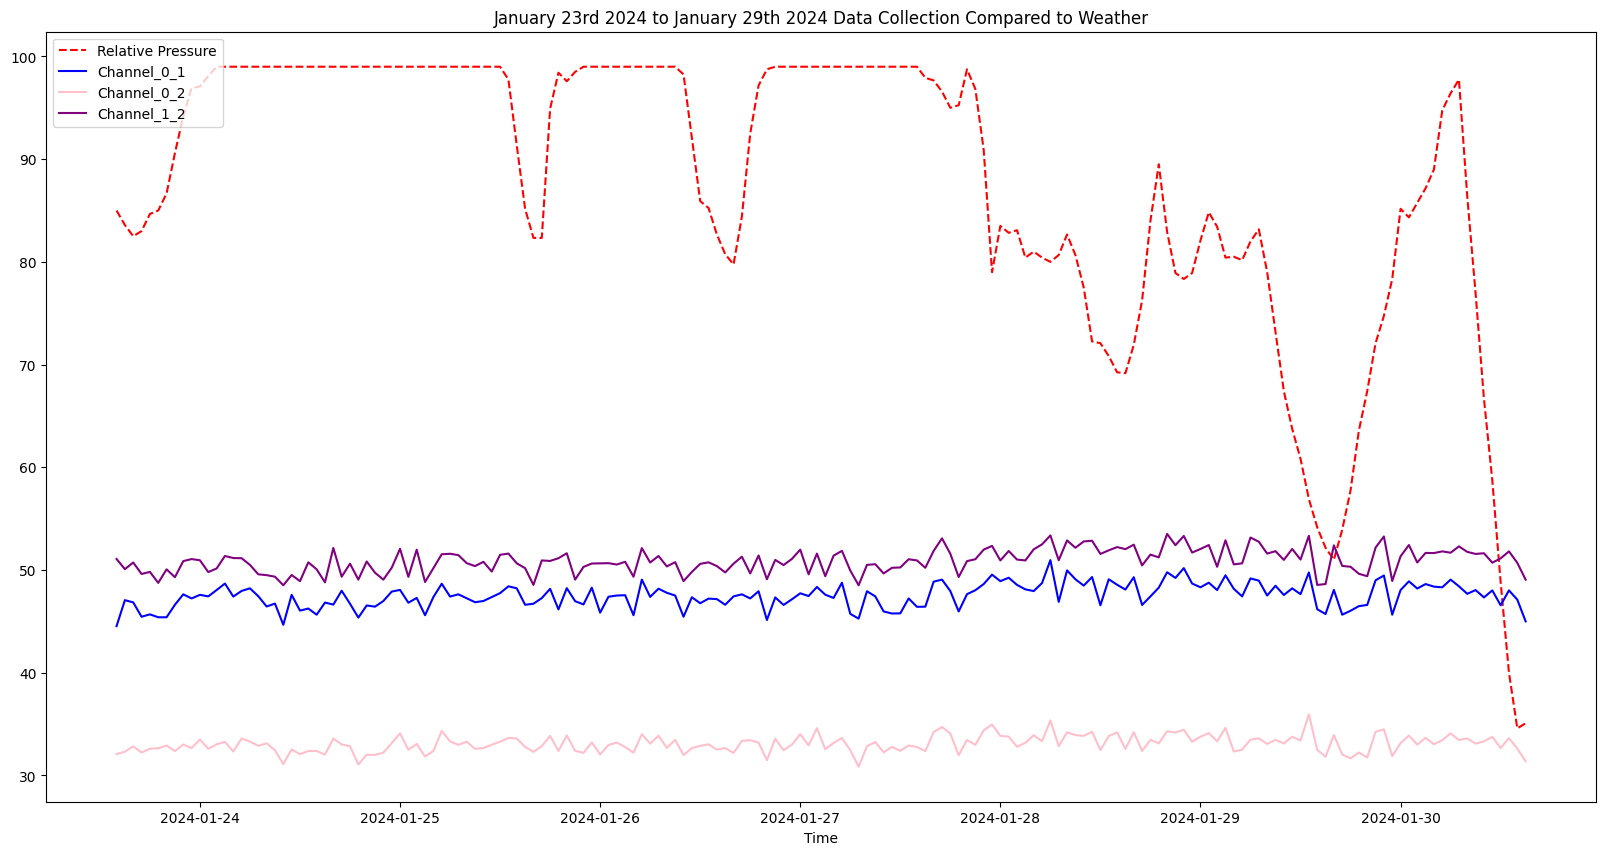

In [20]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_combined.index, df_combined['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_combined.index, df_combined['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_combined.index, df_combined['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_combined.index, df_combined['Chan_0_1'], color='blue', )
ax1.plot(df_combined.index, df_combined['Chan_0_2'], color='pink')
ax1.plot(df_combined.index, df_combined['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


In [21]:
from sklearn.preprocessing import MinMaxScaler
df_copy = df_combined.copy()
#min max scaler
scaler = MinMaxScaler()
#fit the scaler to the data
scaler.fit(df_copy)
#transform the data
scaled_data = scaler.transform(df_copy)
#convert the scaled data to a dataframe
df_scaled = pd.DataFrame(scaled_data, columns=df_copy.columns, index=df_copy.index)
df_scaled.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor_Temperature,Wind_Speed,Wind_Gust,Max_Daily_Gust,Wind_Direction,Hourly_Rain_(in/hr),Event_Rain,Daily_Rain,Weekly_Rain,Monthly_Rain,Yearly_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Avg_Wind_Direction,Absolute_Pressure_(inHg)
timestamp,,,,,,,,,,,,,,,,,,,,
2024-01-23 14:00:00,0.000000,0.240573,0.512051,0.461508,0.484472,0.417092,0.363897,0.205629,0.0,0.03252,0.033333,0.020619,0.0,0.0,0.965944,0.782665,0.250000,0.287127,0.153905,0.965944
2024-01-23 15:00:00,0.393299,0.287582,0.313333,0.495040,0.383851,0.399235,0.363897,0.203347,0.0,0.03252,0.033333,0.020619,0.0,0.0,0.965944,0.760673,0.166667,0.227847,0.219067,0.965944
2024-01-23 16:00:00,0.359593,0.388889,0.443333,0.506746,0.360248,0.385204,0.363897,0.240365,0.0,0.03252,0.033333,0.020619,0.0,0.0,0.969040,0.743855,0.000000,0.142465,0.224138,0.969040
2024-01-23 17:00:00,0.141803,0.271242,0.220000,0.499405,0.629814,0.528061,0.363897,0.212982,0.0,0.03252,0.033333,0.020619,0.0,0.0,0.953560,0.751617,0.000000,0.041919,0.234533,0.953560
2024-01-23 18:00:00,0.178101,0.343137,0.260000,0.481349,0.380124,0.376913,0.363897,0.197008,0.0,0.03252,0.033333,0.020619,0.0,0.0,0.967492,0.777490,0.000000,0.000687,0.150101,0.967492


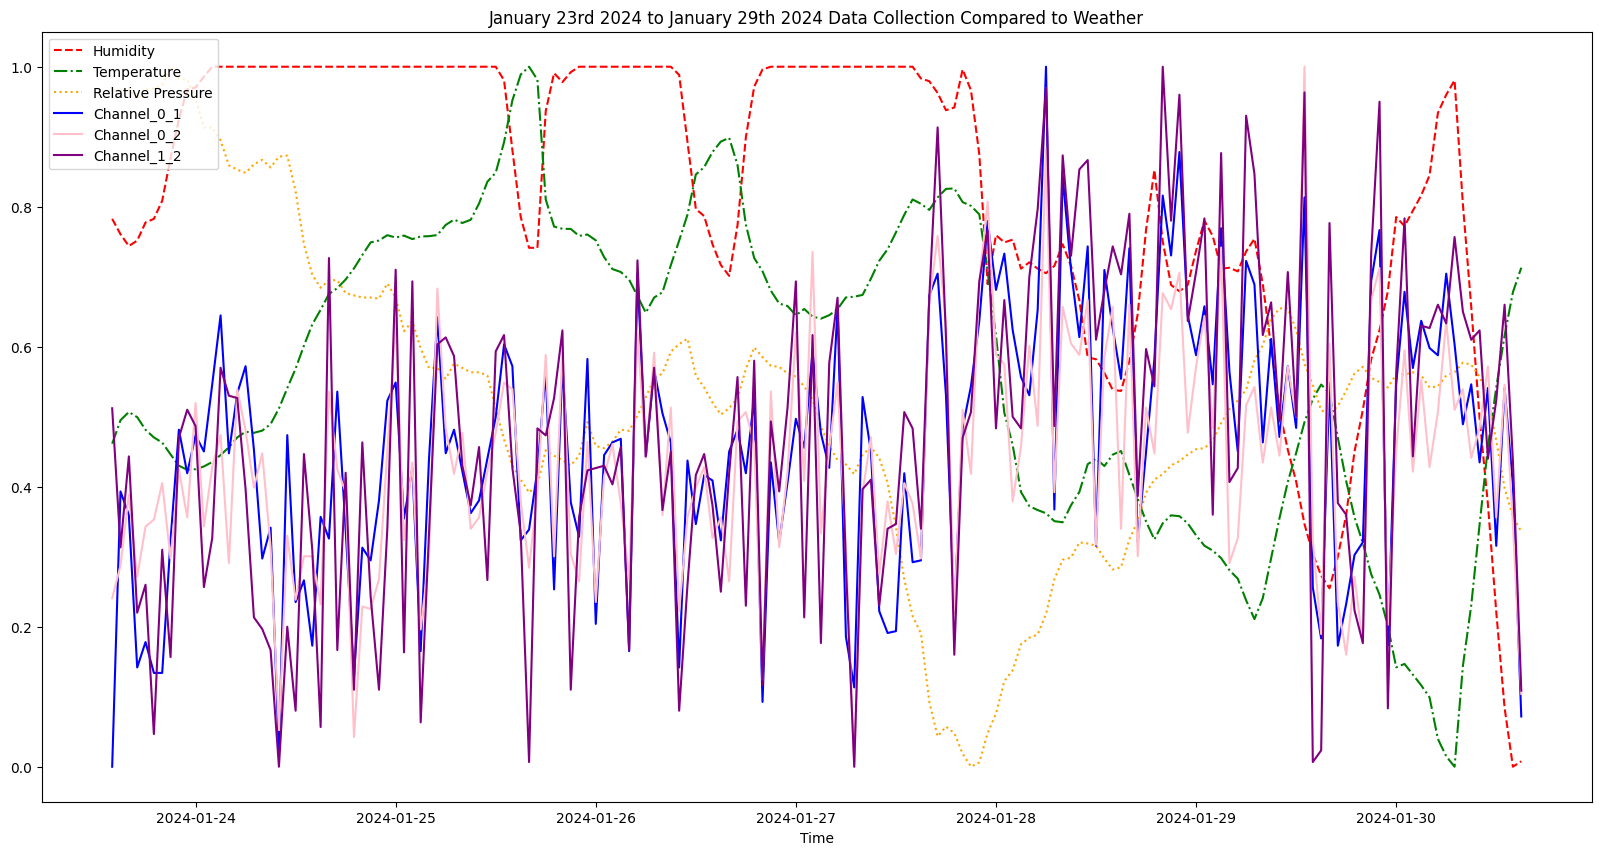

In [23]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax1.plot(df_scaled.index, df_scaled['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax1.plot(df_scaled.index, df_scaled['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_scaled.index, df_scaled['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', )
ax1.plot(df_scaled.index, df_scaled['Chan_0_2'], color='pink')
ax1.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Humidity', 'Temperature', 'Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

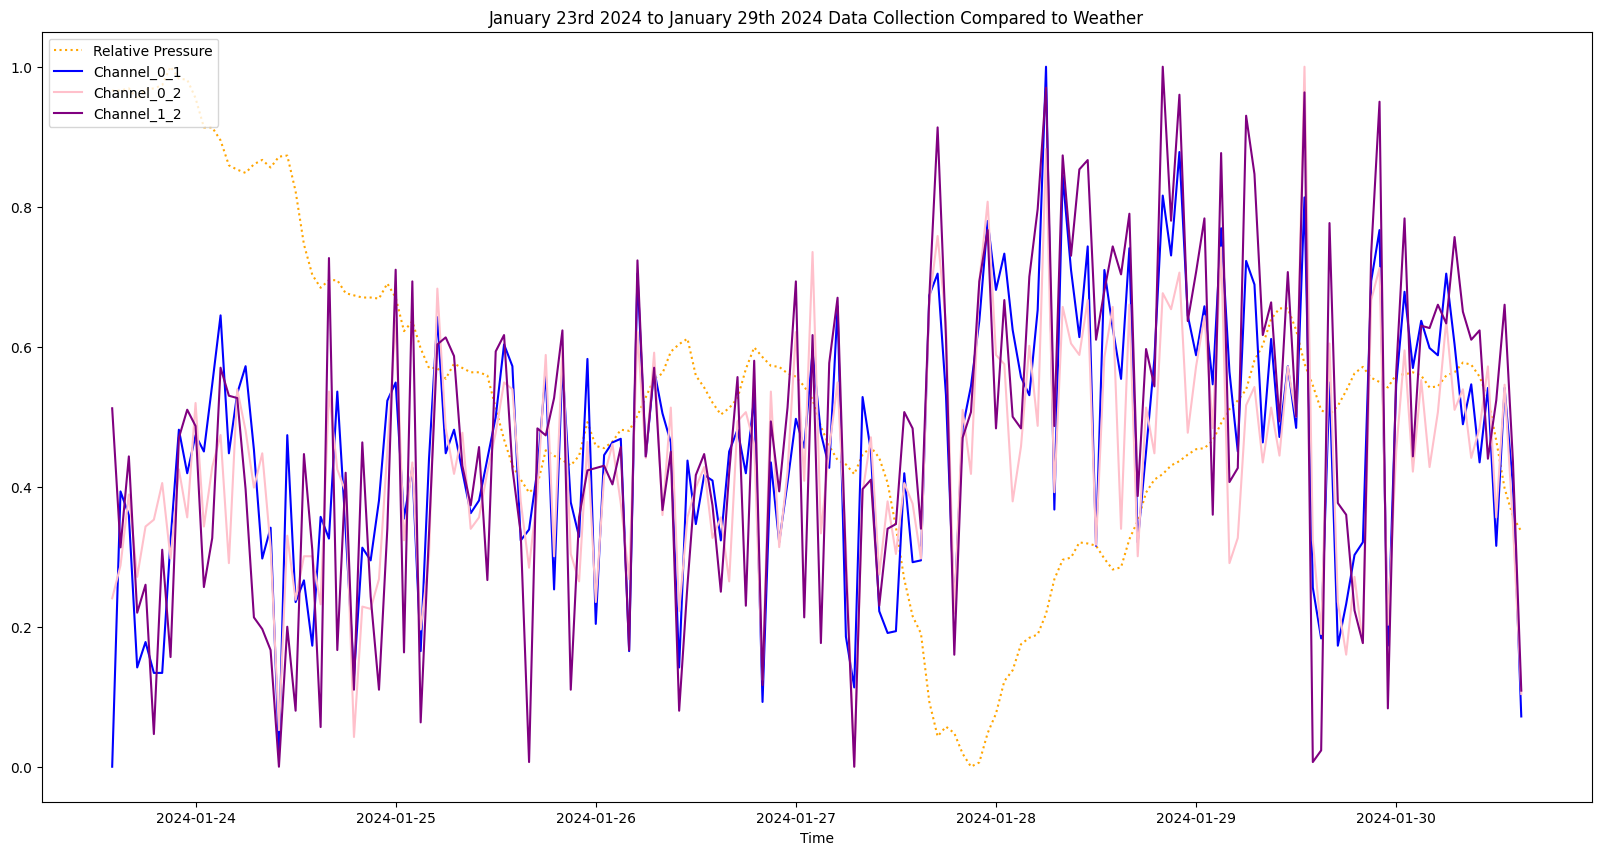

In [24]:
#plot the figure with multiple axes
fig, ax1 = plt.subplots(figsize=(20,10))
#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_scaled.index, df_scaled['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_scaled.index, df_scaled['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_scaled.index, df_scaled['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', )
ax1.plot(df_scaled.index, df_scaled['Chan_0_2'], color='pink')
ax1.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')

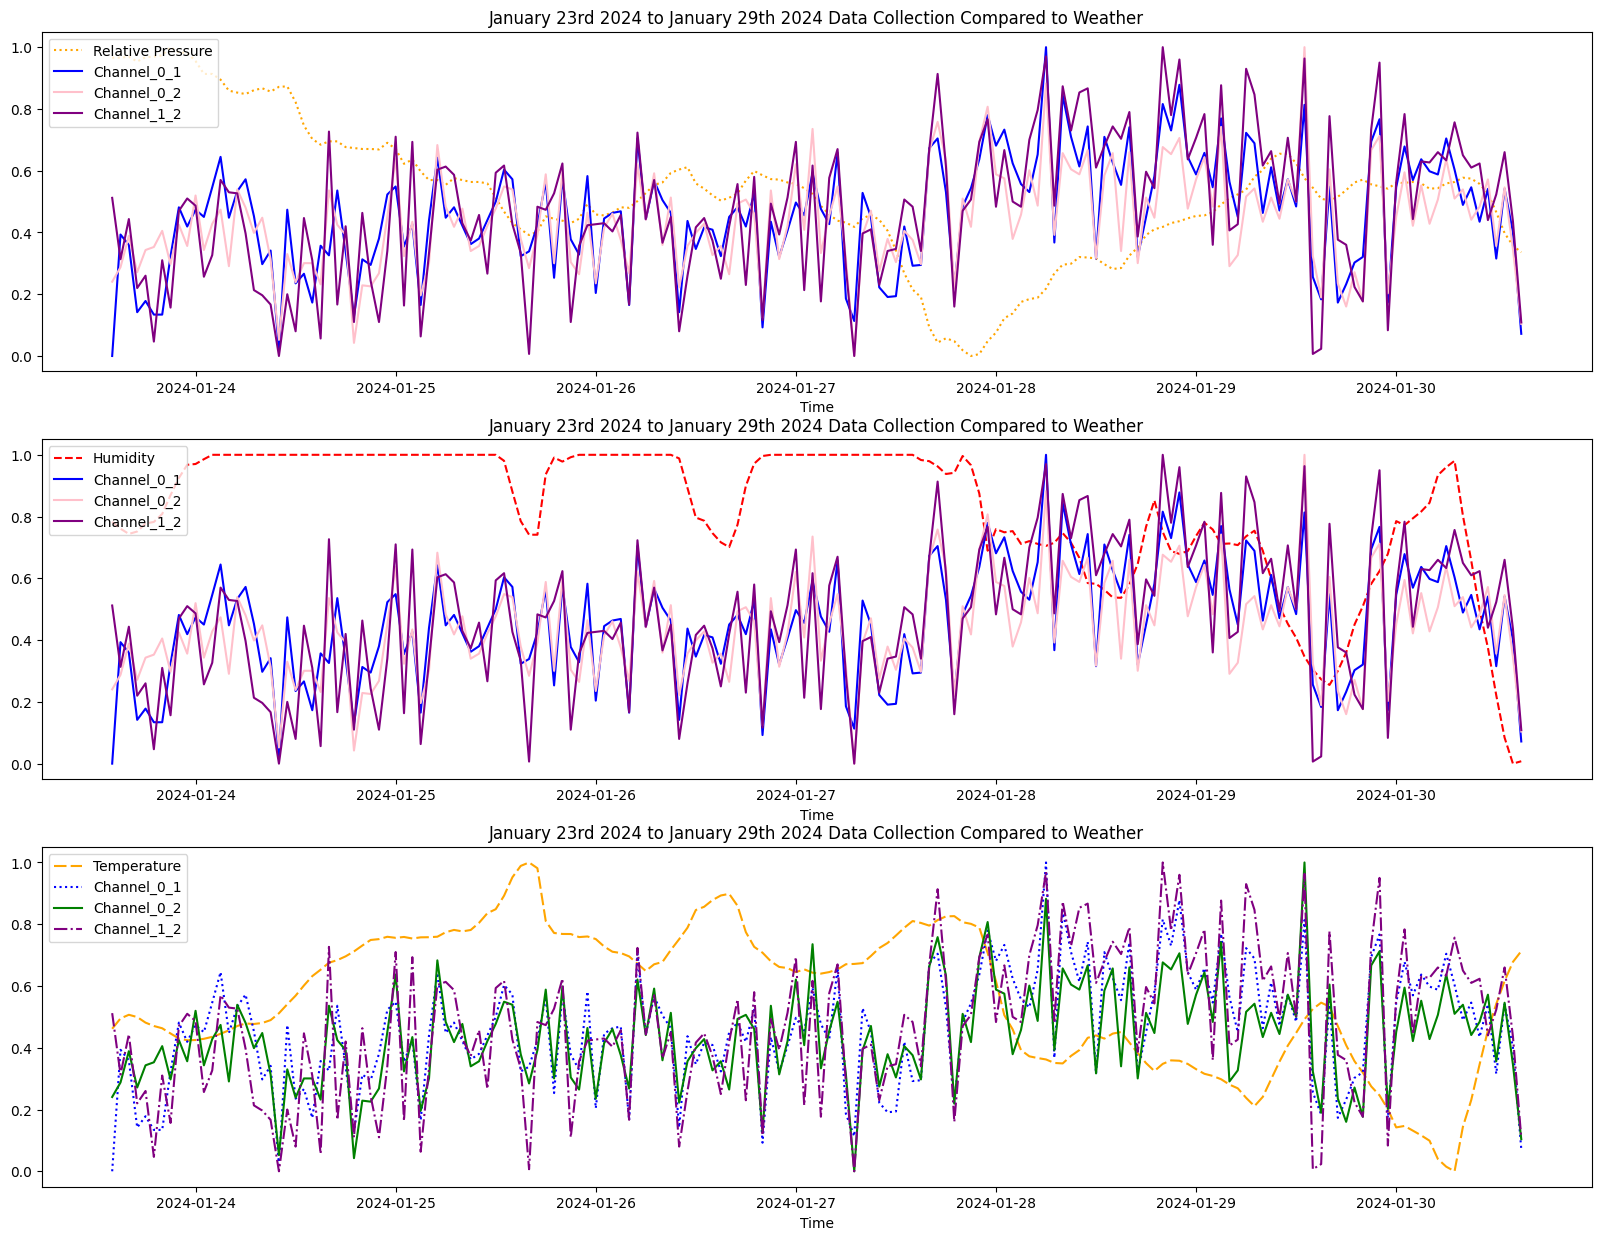

In [26]:
#subplots for 3 axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))

#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax1.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_scaled.index, df_scaled['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_scaled.index, df_scaled['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
ax1.plot(df_scaled.index, df_scaled['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax1.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', )
ax1.plot(df_scaled.index, df_scaled['Chan_0_2'], color='pink')
ax1.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple')
#set the title
ax1.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
ax2.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
ax2.plot(df_scaled.index, df_scaled['Humidity_(%)'], color='red',linestyle='dashed')
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
#ax1.plot(df_scaled.index, df_scaled['Outdoor_Temperature'], color='green',linestyle='dashdot')
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax1.plot(df_scaled.index, df_scaled['Relative_Pressure_(inHg)'], color='orange',linestyle='dotted')
ax2.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', )
ax2.plot(df_scaled.index, df_scaled['Chan_0_2'], color='pink')
ax2.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple')
#set the title
ax2.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax2.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax3.set_xlabel('Time')
#ax1.set_ylabel('Average Counts', color='blue')
#plot humidity on the second axis
#ax1.plot(df_combined.index, df_combined['Humidity (%)'], color='red', dashes=[6, 2])
#ax2.set_ylabel('Humidity', color='red')
#plot temperature on the third axis
ax3.plot(df_scaled.index, df_scaled['Outdoor_Temperature'], color='orange', dashes=[6, 2])
#ax3.set_ylabel('Temperature', color='green')
#plot pressure on the fourth axis
#ax3.plot(df_scaled.index, df_scaled['Relative Pressure (inHg)'], color='gold', dashes=[6, 2])
ax3.plot(df_scaled.index, df_scaled['Chan_0_1'], color='blue', linestyle='dotted')
ax3.plot(df_scaled.index, df_scaled['Chan_0_2'], color='green')
ax3.plot(df_scaled.index, df_scaled['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax3.set_title('January 23rd 2024 to January 29th 2024 Data Collection Compared to Weather')
#set the legend
ax3.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


In [5]:
#make zero mean and unit variance
df_scaled_zmuv = df_combined.copy()
df_scaled_zmuv['Chan_0_1'] = (df_scaled_zmuv['Chan_0_1'] - df_scaled_zmuv['Chan_0_1'].mean()) / df_scaled_zmuv['Chan_0_1'].std()
df_scaled_zmuv['Chan_0_2'] = (df_scaled_zmuv['Chan_0_2'] - df_scaled_zmuv['Chan_0_2'].mean()) / df_scaled_zmuv['Chan_0_2'].std()
df_scaled_zmuv['Chan_1_2'] = (df_scaled_zmuv['Chan_1_2'] - df_scaled_zmuv['Chan_1_2'].mean()) / df_scaled_zmuv['Chan_1_2'].std()
df_scaled_zmuv['Humidity_(%)'] = (df_scaled_zmuv['Humidity_(%)'] - df_scaled_zmuv['Humidity_(%)'].mean()) / df_scaled_zmuv['Humidity_(%)'].std()
df_scaled_zmuv['Outdoor_Temperature'] = (df_scaled_zmuv['Outdoor_Temperature'] - df_scaled_zmuv['Outdoor_Temperature'].mean()) / df_scaled_zmuv['Outdoor_Temperature'].std()
df_scaled_zmuv['Relative_Pressure_(inHg)'] = (df_scaled_zmuv['Relative_Pressure_(inHg)'] - df_scaled_zmuv['Relative_Pressure_(inHg)'].mean()) / df_scaled_zmuv['Relative_Pressure_(inHg)'].std()
df_scaled_zmuv.head()

,Chan_0_1,Chan_0_2,Chan_1_2,Outdoor_Temperature,Wind_Speed,Wind_Gust,Max_Daily_Gust,Wind_Direction,Hourly_Rain,Event_Rain,Daily_Rain,Weekly_Rain,Monthly_Rain,Total_Rain,Relative_Pressure_(inHg),Humidity_(%),Ultra-Violet_Radiation_Index,Solar_Radiation_(W/m^2),Absolute_Pressure,CO2_battery
timestamp,,,,,,,,,,,,,,,,,,,,
2024-01-23 14:00:00,-2.688721,-1.445137,-0.065289,-0.023236,0.141667,0.550000,12.5,160.833333,0.0,0.06,0.06,0.06,5.33,71.92,2.043286,0.588794,0.0,72.400000,29.304167,1.0
2024-01-23 15:00:00,-0.666410,-1.178556,-0.865702,0.034303,0.583333,0.916667,12.5,71.666667,0.0,0.06,0.06,0.06,5.33,71.92,2.048725,0.564554,0.0,47.875000,29.302500,1.0
2024-01-23 16:00:00,-0.839722,-0.604053,-0.342077,0.025814,0.908333,1.383333,12.5,89.083333,0.0,0.06,0.06,0.06,5.33,71.92,2.032407,0.584754,0.0,38.716667,29.304167,1.0
2024-01-23 17:00:00,-1.959582,-1.271218,-1.241638,0.006949,1.316667,2.150000,12.5,122.500000,0.0,0.06,0.06,0.06,5.33,71.92,2.010651,0.564554,0.0,11.833333,29.299167,1.0
2024-01-23 18:00:00,-1.772938,-0.863506,-1.080522,-0.075115,0.725000,1.383333,12.5,130.000000,0.0,0.06,0.06,0.06,5.33,71.92,2.032407,0.633234,0.0,0.175000,29.303333,1.0


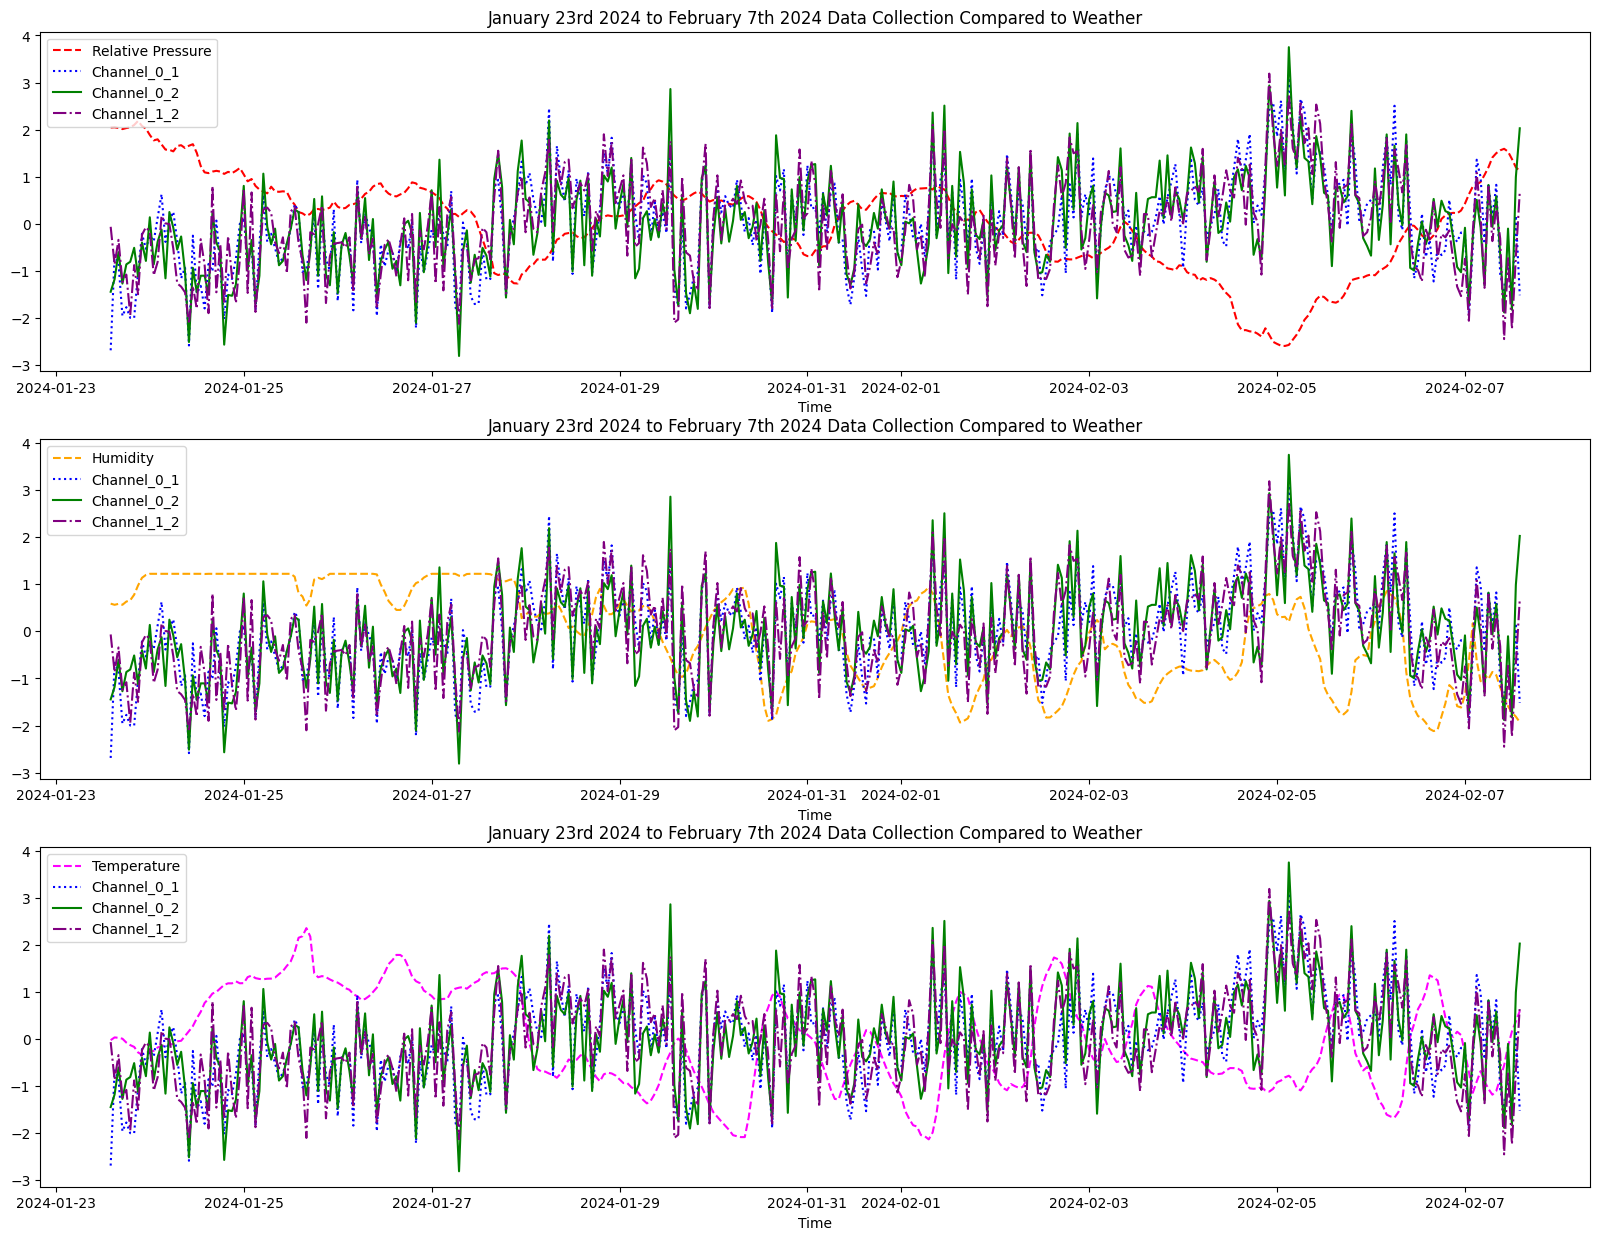

In [6]:
#subplots for 3 axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))
ax1.set_xlabel('Time')
#plot pressure on the fourth axis
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Relative_Pressure_(inHg)'], color='red',linestyle='dashed')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax1.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax1.set_title('January 23rd 2024 to February 7th 2024 Data Collection Compared to Weather')
#set the legend
ax1.legend(['Relative Pressure', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
ax2.set_xlabel('Time')
#plot humidity on the second axis
ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Humidity_(%)'], color='orange',linestyle='dashed')

ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax2.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax2.set_title('January 23rd 2024 to February 7th 2024 Data Collection Compared to Weather')
#set the legend
ax2.legend(['Humidity', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')


#plot average counts on the first axis
#ax1.plot(df_combined.index, df_combined['average'], color='blue')
ax3.set_xlabel('Time')

ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Outdoor_Temperature'], color='magenta', linestyle='dashed')

ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_1'], color='blue', linestyle='dotted')
ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_0_2'], color='green')
ax3.plot(df_scaled_zmuv.index, df_scaled_zmuv['Chan_1_2'], color='purple', linestyle='dashdot')
#set the title
ax3.set_title('January 23rd 2024 to February 7th 2024 Data Collection Compared to Weather')
#set the legend
ax3.legend(['Temperature', 'Channel_0_1', 'Channel_0_2', 'Channel_1_2'], loc='upper left')
